In [1]:
import import_ipynb
import numpy as np
from qiskit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeWashingtonV2
from qiskit_ibm_runtime import SamplerV2, Batch
from qiskit_aer.primitives import EstimatorV2

from collections import defaultdict
import matplotlib.pyplot as plt

from functions import *

In [2]:
num_shots = 1024**2

### prep

In [3]:
# create test circuit: 2 qubits, 1 CNOT
qc_1 = QuantumCircuit(2, 1)
qc_1.append(test_circuit_1(), range(2))
qc_1.decompose()
qc_1.measure_all()
qc_1 = qc_1.decompose()

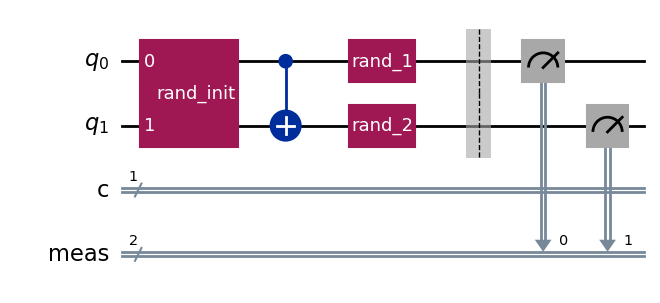

In [4]:
qc_1.draw('mpl')

In [5]:
# create test circuit: 2 qubits, 3 CNOTs
qc_2 = QuantumCircuit(2, 3)
qc_2.append(test_circuit_2(), range(2))
qc_2.decompose()
qc_2.measure_all()
qc_2 = qc_2.decompose()

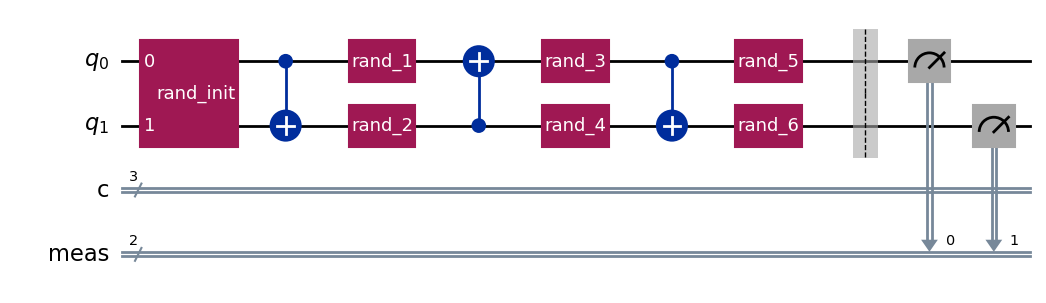

In [6]:
qc_2.draw('mpl')

In [7]:
# create test circuit: 3 qubits, 3 CNOTS
qc_3 = QuantumCircuit(3, 3)
qc_3.append(test_circuit(), range(3))
qc_3.decompose()
qc_3.measure_all()
qc_3 = qc_3.decompose()

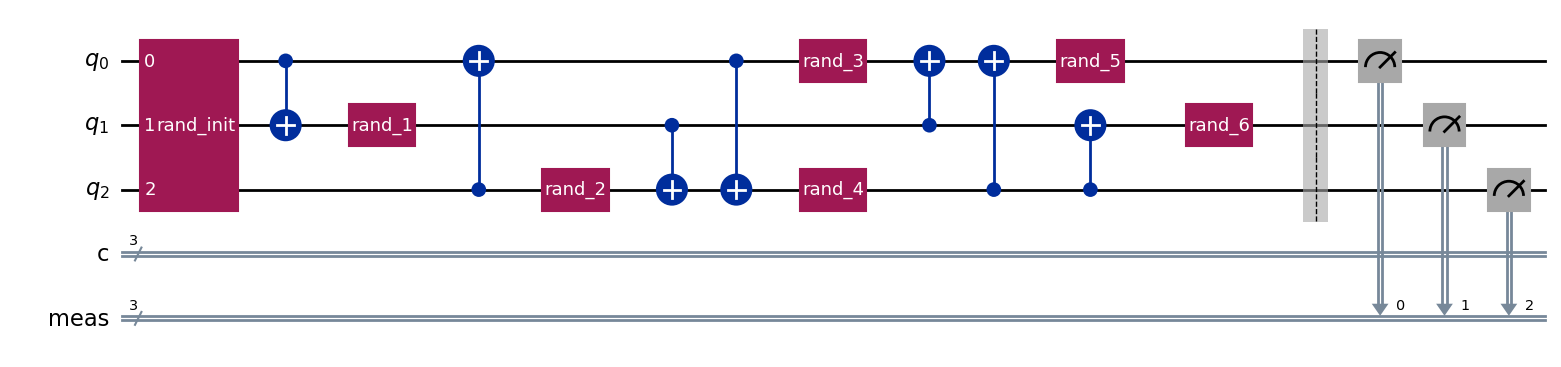

In [8]:
qc_3.draw('mpl')

# test circuit 1

## no noise

In [9]:
# qc_1, no noise, not knitted, 1024,...,1024**2 shots
qc_1_no_knit_no_noise = defaultdict(dict)
for i in range(0, 11):
    shots = 1024*2**i
    qc_1_no_knit_no_noise[str(shots)] = do_run(qc_1, shots)

In [10]:
# qc_1, no noise, knitted, 1024,...,1024**2 shots
qc_1_knitted_no_noise = defaultdict(dict)
for i in range(0, 11):
    shots = 1024*2**i
    qc_1_knitted_no_noise[str(shots)] = circuit_knitter(qc_1, 0, 1, shots)

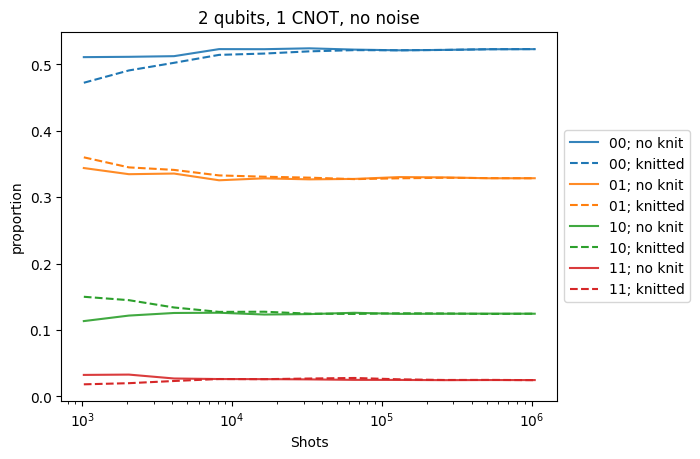

In [11]:
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_no_noise[str(1024*2**i)]['00']/(1024*2**i) for i in range(0, 11)],\
             color='tab:blue', alpha=0.9, label = '00; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_no_noise[str(1024*2**i)]['00']/(1024*2**i) for i in range(0, 11)],\
             color='tab:blue', linestyle = 'dashed', label = '00; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_no_noise[str(1024*2**i)]['01']/(1024*2**i) for i in range(0, 11)],\
             color='tab:orange', alpha=0.9, label = '01; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_no_noise[str(1024*2**i)]['01']/(1024*2**i) for i in range(0, 11)],\
             color='tab:orange', linestyle = 'dashed', label = '01; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_no_noise[str(1024*2**i)]['10']/(1024*2**i) for i in range(0, 11)],
             color='tab:green', alpha=0.9, label = '10; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_no_noise[str(1024*2**i)]['10']/(1024*2**i) for i in range(0, 11)],\
             color='tab:green', linestyle = 'dashed', label = '10; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_no_noise[str(1024*2**i)]['11']/(1024*2**i) for i in range(0, 11)],
             color='tab:red', alpha=0.9, label = '11; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_no_noise[str(1024*2**i)]['11']/(1024*2**i) for i in range(0, 11)],\
             color='tab:red', linestyle = 'dashed', label = '11; knitted')

plt.xlabel('Shots')
plt.ylabel('proportion')
plt.title('2 qubits, 1 CNOT, no noise')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## noisy

In [12]:
# qc_1, with noise, not knitted, 1024,...,1024**2 shots
qc_1_no_knit_noise = defaultdict(dict)
for i in range(0, 11):
    shots = 1024*2**i
    qc_1_no_knit_noise[str(shots)] = do_run(qc_1, shots, noise=True)

In [13]:
# qc_1, with noise, knitted, 1024,...,1024**2 shots
qc_1_knitted_noise = defaultdict(dict)
for i in range(0, 11):
    shots = 1024*2**i
    qc_1_knitted_noise[str(shots)] = circuit_knitter(qc_1, 0, 1, shots, noise=True)

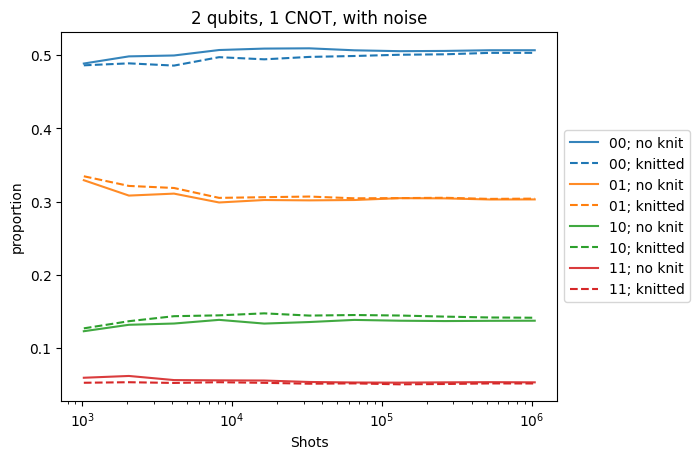

In [14]:
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_noise[str(1024*2**i)]['00']/(1024*2**i) for i in range(0, 11)],\
             color='tab:blue', alpha=0.9, label = '00; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_noise[str(1024*2**i)]['00']/(1024*2**i) for i in range(0, 11)],\
             color='tab:blue', linestyle = 'dashed', label = '00; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_noise[str(1024*2**i)]['01']/(1024*2**i) for i in range(0, 11)],\
             color='tab:orange', alpha=0.9, label = '01; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_noise[str(1024*2**i)]['01']/(1024*2**i) for i in range(0, 11)],\
             color='tab:orange', linestyle = 'dashed', label = '01; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_noise[str(1024*2**i)]['10']/(1024*2**i) for i in range(0, 11)],
             color='tab:green', alpha=0.9, label = '10; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_noise[str(1024*2**i)]['10']/(1024*2**i) for i in range(0, 11)],\
             color='tab:green', linestyle = 'dashed', label = '10; knitted')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_no_knit_noise[str(1024*2**i)]['11']/(1024*2**i) for i in range(0, 11)],
             color='tab:red', alpha=0.9, label = '11; no knit')
plt.semilogx([1024*2**i for i in range(0, 11)], [qc_1_knitted_noise[str(1024*2**i)]['11']/(1024*2**i) for i in range(0, 11)],\
             color='tab:red', linestyle = 'dashed', label = '11; knitted')

plt.xlabel('Shots')
plt.ylabel('proportion')
plt.title('2 qubits, 1 CNOT, with noise')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# test circuit 2

## no noise

In [16]:
# qc_2, no noise, not knitted, num_shots shots
qc_2_no_knit_no_noise_1048576 = do_run(qc_2, num_shots)
print(qc_2_no_knit_no_noise_1048576)
print({key: qc_2_no_knit_no_noise_1048576[key]/num_shots for key in qc_2_no_knit_no_noise_1048576})

{'00': 212059, '01': 175397, '10': 629552, '11': 31568}
{'00': 0.20223522186279297, '01': 0.16727161407470703, '10': 0.6003875732421875, '11': 0.0301055908203125}


In [17]:
# qc_2, no noise, knitted, num_shots shots
qc_2_knitted_no_noise_1048576 = circuit_knitter(qc_2, 0, 1, num_shots)
print(qc_2_knitted_no_noise_1048576)
print({key: qc_2_knitted_no_noise_1048576[key]/num_shots for key in qc_2_knitted_no_noise_1048576})

{'00': 211719.125, '01': 175676.125, '10': 630289.375, '11': 30891.375}
{'00': 0.2019110918045044, '01': 0.16753780841827393, '10': 0.6010907888412476, '11': 0.02946031093597412}


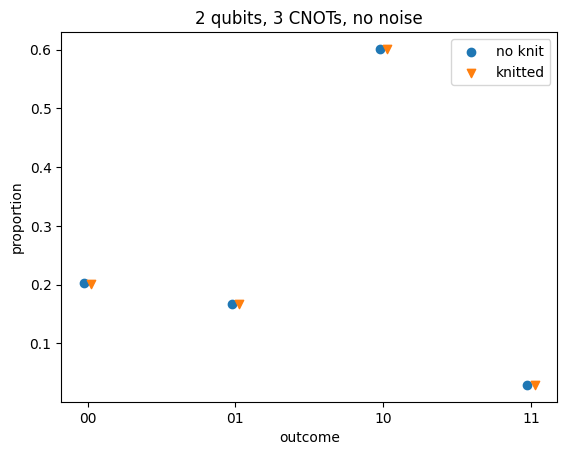

In [62]:
plt.scatter(np.linspace(0.975, 3.975, 4), {key: qc_2_no_knit_no_noise_1048576[key]/num_shots for key in qc_2_no_knit_no_noise_1048576}.values(), label='no knit')
plt.scatter(np.linspace(1.025, 4.025, 4), {key: qc_2_knitted_no_noise_1048576[key]/num_shots for key in qc_2_knitted_no_noise_1048576}.values(), marker='v', label='knitted')
plt.xticks(ticks=[*range(1,5)], labels=['00', '01', '10', '11'])
plt.xlabel('outcome')
plt.ylabel('proportion')
plt.title('2 qubits, 3 CNOTs, no noise')
plt.legend()
plt.show()

## noisy

In [19]:
# qc_2, noise, not knitted, num_shots shots
qc_2_no_knit_noise_1048576 = do_run(qc_2, num_shots, noise=True)
print(qc_2_no_knit_noise_1048576)
print({key: qc_2_no_knit_noise_1048576[key]/num_shots for key in qc_2_no_knit_noise_1048576})

{'00': 219761, '01': 192181, '10': 540598, '11': 96036}
{'00': 0.2095804214477539, '01': 0.18327808380126953, '10': 0.5155544281005859, '11': 0.09158706665039062}


In [20]:
# qc_2, noise, knitted, num_shots shots
qc_2_knitted_noise_1048576 = circuit_knitter(qc_2, 0, 1, num_shots, noise=True)
print(qc_2_knitted_noise_1048576)
print({key: qc_2_knitted_noise_1048576[key]/num_shots for key in qc_2_knitted_noise_1048576})

{'00': 218069.125, '01': 190506.25, '10': 567809.875, '11': 72202.25}
{'00': 0.20796692371368408, '01': 0.18168091773986816, '10': 0.5415056943893433, '11': 0.06885743141174316}


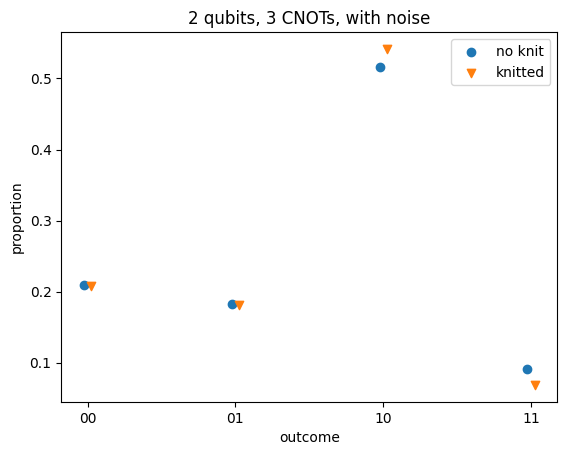

In [63]:
plt.scatter(np.linspace(0.975, 3.975, 4), {key: qc_2_no_knit_noise_1048576[key]/num_shots for key in qc_2_knitted_noise_1048576}.values(), label='no knit')
plt.scatter(np.linspace(1.025, 4.025, 4), {key: qc_2_knitted_noise_1048576[key]/num_shots for key in qc_2_knitted_noise_1048576}.values(), marker='v', label='knitted')
plt.xticks(ticks=[*range(1,5)], labels=['00', '01', '10', '11'])
plt.xlabel('outcome')
plt.ylabel('proportion')
plt.title('2 qubits, 3 CNOTs, with noise')
plt.legend()
plt.show()

# test circuit 3 

## no noise

In [22]:
# qc_3, no noise, not knitted, num_shots shots
qc_3_no_knit_no_noise_1048576 = do_run(qc_3, num_shots)
print(qc_3_no_knit_no_noise_1048576)
print({key: qc_3_no_knit_no_noise_1048576[key]/num_shots for key in qc_3_no_knit_no_noise_1048576})

{'000': 89296, '001': 26439, '010': 164215, '011': 355676, '100': 81174, '101': 41378, '110': 75944, '111': 214454}
{'000': 0.0851593017578125, '001': 0.025214195251464844, '010': 0.15660762786865234, '011': 0.3391990661621094, '100': 0.07741355895996094, '101': 0.03946113586425781, '110': 0.07242584228515625, '111': 0.20451927185058594}


In [23]:
# qc_3, no noise, knitted (0 and 1), num_shots shots
qc_3_knitted_01_no_noise_1048576 = circuit_knitter(qc_3, 0, 1, num_shots)
print(qc_3_knitted_01_no_noise_1048576)
print({key: qc_3_knitted_01_no_noise_1048576[key]/num_shots for key in qc_3_knitted_01_no_noise_1048576})

{'000': 89544.0, '001': 26847.25, '010': 163646.0, '011': 356164.25, '100': 81109.0, '101': 41028.25, '110': 75905.0, '111': 214332.25}
{'000': 0.08539581298828125, '001': 0.025603532791137695, '010': 0.1560649871826172, '011': 0.3396646976470947, '100': 0.07735157012939453, '101': 0.03912758827209473, '110': 0.0723886489868164, '111': 0.20440316200256348}


In [24]:
# qc_3, no noise, knitted (0 and 2), num_shots shots
qc_3_knitted_02_no_noise_1048576 = circuit_knitter(qc_3, 0, 2, num_shots)
print(qc_3_knitted_02_no_noise_1048576)
print({key: qc_3_knitted_02_no_noise_1048576[key]/num_shots for key in qc_3_knitted_02_no_noise_1048576})

{'000': 89426.875, '001': 26699.75, '010': 163720.625, '011': 356553.75, '100': 80878.5, '101': 40865.75, '110': 76121.25, '111': 214309.5}
{'000': 0.08528411388397217, '001': 0.025462865829467773, '010': 0.156136155128479, '011': 0.34003615379333496, '100': 0.07713174819946289, '101': 0.03897261619567871, '110': 0.07259488105773926, '111': 0.20438146591186523}


In [25]:
# qc_3, no noise, knitted (1 and 2), num_shots shots
qc_3_knitted_12_no_noise_1048576 = circuit_knitter(qc_3, 1, 2, num_shots)
print(qc_3_knitted_12_no_noise_1048576)
print({key: qc_3_knitted_12_no_noise_1048576[key]/num_shots for key in qc_3_knitted_12_no_noise_1048576})

{'000': 89148.5, '001': 26713.75, '010': 163658.25, '011': 356247.25, '100': 81418.0, '101': 40960.25, '110': 75941.25, '111': 214488.75}
{'000': 0.08501863479614258, '001': 0.02547621726989746, '010': 0.15607666969299316, '011': 0.33974385261535645, '100': 0.07764625549316406, '101': 0.0390627384185791, '110': 0.07242321968078613, '111': 0.20455241203308105}


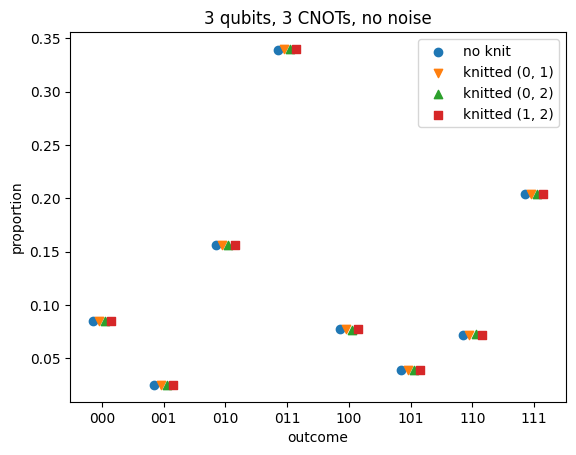

In [55]:
plt.scatter(np.linspace(0.85, 7.85, 8), {key: qc_3_no_knit_no_noise_1048576[key]/num_shots for key in qc_3_no_knit_no_noise_1048576}.values(),\
            label='no knit')
plt.scatter(np.linspace(0.95, 7.95, 8), {key: qc_3_knitted_01_no_noise_1048576[key]/num_shots for key in qc_3_knitted_01_no_noise_1048576}.values(),\
            marker='v', label='knitted (0, 1)')
plt.scatter(np.linspace(1.05, 8.05, 8), {key: qc_3_knitted_02_no_noise_1048576[key]/num_shots for key in qc_3_knitted_02_no_noise_1048576}.values(),\
            marker='^', label='knitted (0, 2)')
plt.scatter(np.linspace(1.15, 8.15, 8), {key: qc_3_knitted_12_no_noise_1048576[key]/num_shots for key in qc_3_knitted_12_no_noise_1048576}.values(),\
            marker='s', label='knitted (1, 2)')
plt.xticks(ticks=[*range(1,9)], labels=['000', '001', '010', '011', '100', '101', '110', '111'])
plt.xlabel('outcome')
plt.ylabel('proportion')
plt.title('3 qubits, 3 CNOTs, no noise')
plt.legend()
plt.show()

## noisy

In [27]:
# qc_3, noise, not knitted, num_shots shots
qc_3_no_knit_noise_1048576 = do_run(qc_3, num_shots, noise=True)
print(qc_3_no_knit_noise_1048576)
print({key: qc_3_no_knit_noise_1048576[key]/num_shots for key in qc_3_no_knit_noise_1048576})

{'000': 104306, '001': 59573, '010': 170133, '011': 275728, '100': 90215, '101': 67512, '110': 91188, '111': 189921}
{'000': 0.09947395324707031, '001': 0.05681324005126953, '010': 0.16225147247314453, '011': 0.2629547119140625, '100': 0.08603572845458984, '101': 0.06438446044921875, '110': 0.08696365356445312, '111': 0.1811227798461914}


In [28]:
# qc_3, noise, knitted (0 and 1), num_shots shots
qc_3_knitted_01_noise_1048576 = circuit_knitter(qc_3, 0, 1, num_shots, noise=True)
print(qc_3_knitted_01_noise_1048576)
print({key: qc_3_knitted_01_noise_1048576[key]/num_shots for key in qc_3_knitted_01_noise_1048576})

{'000': 103850.0, '001': 55262.0, '010': 166406.5, '011': 280249.25, '100': 90923.0, '101': 64572.5, '110': 91074.5, '111': 196164.75}
{'000': 0.09903907775878906, '001': 0.05270195007324219, '010': 0.15869760513305664, '011': 0.26726651191711426, '100': 0.08671092987060547, '101': 0.06158113479614258, '110': 0.08685541152954102, '111': 0.18707728385925293}


In [29]:
# qc_3, noise, knitted (0 and 2), num_shots shots
qc_3_knitted_02_noise_1048576 = circuit_knitter(qc_3, 0, 2, num_shots, noise=True)
print(qc_3_knitted_02_noise_1048576)
print({key: qc_3_knitted_02_noise_1048576[key]/num_shots for key in qc_3_knitted_02_noise_1048576})

{'000': 98606.125, '001': 57488.75, '010': 164322.125, '011': 279529.375, '100': 91697.25, '101': 67097.5, '110': 90604.875, '111': 195543.0}
{'000': 0.09403812885284424, '001': 0.054825544357299805, '010': 0.15670979022979736, '011': 0.2665799856185913, '100': 0.08744931221008301, '101': 0.06398916244506836, '110': 0.08640754222869873, '111': 0.18648433685302734}


In [30]:
# qc_3, noise, knitted (1 and 2), num_shots shots
qc_3_knitted_12_noise_1048576 = circuit_knitter(qc_3, 0, 2, num_shots, noise=True)
print(qc_3_knitted_12_noise_1048576)
print({key: qc_3_knitted_12_noise_1048576[key]/num_shots for key in qc_3_knitted_12_noise_1048576})

{'000': 98606.125, '001': 57488.75, '010': 164322.125, '011': 279529.375, '100': 91697.25, '101': 67097.5, '110': 90604.875, '111': 195543.0}
{'000': 0.09403812885284424, '001': 0.054825544357299805, '010': 0.15670979022979736, '011': 0.2665799856185913, '100': 0.08744931221008301, '101': 0.06398916244506836, '110': 0.08640754222869873, '111': 0.18648433685302734}


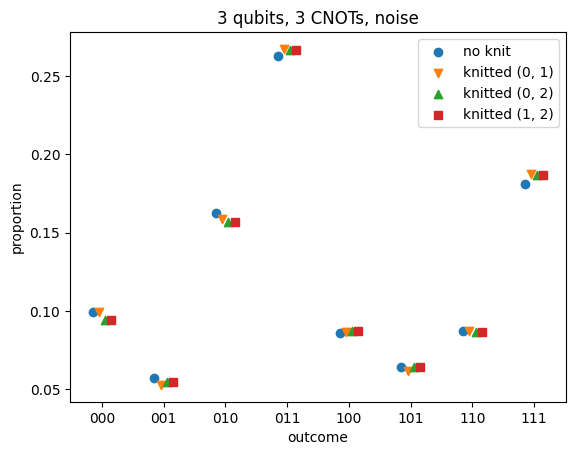

In [65]:
plt.scatter(np.linspace(0.85, 7.85, 8), {key: qc_3_no_knit_noise_1048576[key]/num_shots for key in qc_3_no_knit_noise_1048576}.values(),\
            label='no knit')
plt.scatter(np.linspace(0.95, 7.95, 8), {key: qc_3_knitted_01_noise_1048576[key]/num_shots for key in qc_3_knitted_01_noise_1048576}.values(),\
            marker='v', label='knitted (0, 1)')
plt.scatter(np.linspace(1.05, 8.05, 8), {key: qc_3_knitted_02_noise_1048576[key]/num_shots for key in qc_3_knitted_02_noise_1048576}.values(),\
            marker='^', label='knitted (0, 2)')
plt.scatter(np.linspace(1.15, 8.15, 8), {key: qc_3_knitted_12_noise_1048576[key]/num_shots for key in qc_3_knitted_12_noise_1048576}.values(),\
            marker='s', label='knitted (1, 2)')
plt.xticks(ticks=[*range(1,9)], labels=['000', '001', '010', '011', '100', '101', '110', '111'])
plt.xlabel('outcome')
plt.ylabel('proportion')
plt.title('3 qubits, 3 CNOTs, noise')
plt.legend()
plt.show()